Statistics coded: Tourism Statistics

Prepared by Sarah Hadj Hassen.

In [ ]:
#install.packages(c("ggplot2", "plotly", "tidyr", "repr", "dplyr", "devtools", "restatapi"))
#install.packages("eurostat")
#install.packages("patchwork")
#install.packages("Matching")
#install.packages("ggforce")

library(ggplot2)
library(tidyr)
library(dplyr)
library(eurostat)
library(Matching)
library(stats)
library(base)
library(ggforce)

create graph in abstract part

In [ ]:
## tourism destinations - nights spent at toursit accommondation establishments, 2018

data <- get_eurostat(id="tour_occ_ninat")
nrow(data)

# first check whether all countries needed and create countries vector
countr <- c("ES","IT","FR","EL","AT","DE","HR","PT","NL","CZ","BE","BG","PL","IE","CY","SE","HU","DK","SI",
                         "MT","FI","SK","RO","EE","LV","LT","LU","UK","CH","NO","IS","LI","TR","ME","RS","MK","XK")
levels(data$geo)
levels(data$c_resid)
levels(data$nace_r2)

In [ ]:
# for Ireland, Slovenia, United Kingdom, Switzerland, Norway, Iceland, Montenegro, Serbia and Kosovo we need 2018 monthly data
data_month <- get_eurostat(id="tour_occ_nim")
nrow(data_month)

data_month$year <- as.integer(substr(data_month$time,1,4))
data_month$month <- as.integer(substr(data_month$time,6,7))

countr2 <- c("IE","SI","UK","CH","NO","IS","ME","RS","XK")

data_mod <- subset(data_month, 
                    data_month$geo %in% countr2 & 
                    data_month$year==2018 &
                    data_month$c_resid=="FOR" &
                    data_month$nace_r2=="I551-I553"&
                    data_month$unit=="NR")

nrow(data_mod)
levels(data_mod$geo)

data_mod1 <- aggregate(data_mod$values, by = list(geo = data_mod$geo), FUN = sum)
names(data_mod1)[2] <- "values"

In [ ]:
# building needed subset for the other countries
data$year <- as.integer(substr(data$time,1,4))
head(data)

data_mod2 <- subset(data, 
                    data$geo %in% countr & 
                    data$year==2018 &
                    data$c_resid=="FOR" &
                    data$nace_r2=="I551-I553"&
                    data$unit=="NR")
nrow(data_mod2)
data_mod2 <- data_mod2[,c(4,6)]
data_mod2

In [ ]:
# for Turkey we need data from 2016
countr3 <- c("TR")

data_mod3 <- subset(data, 
                    data$geo %in% countr3 & 
                    data$year==2016 &
                    data$c_resid=="FOR" &
                    data$nace_r2=="I551-I553"&
                    data$unit=="NR")
data_mod3 <- data_mod3[,c(4,6)]
data_mod3  

In [ ]:
#match data_mod1 and data_mod2 and data_mod3
data_mod4 <- rbind(data_mod1,data_mod2,data_mod3)
data_mod4

In [ ]:
# bring the country names in the order the grpahik shows
data_mod4$geo <- factor(data_mod4$geo,
                        levels = c("ES","IT","FR","EL","AT","DE","HR","PT","NL","CZ","BE","BG","PL","IE","CY","SE","HU",
                                   "DK","SI", "MT","FI","SK","RO","EE","LV","LT","LU","UK","CH","NO","IS","LI","TR","ME",
                                   "RS","MK","XK"))
data_mod4

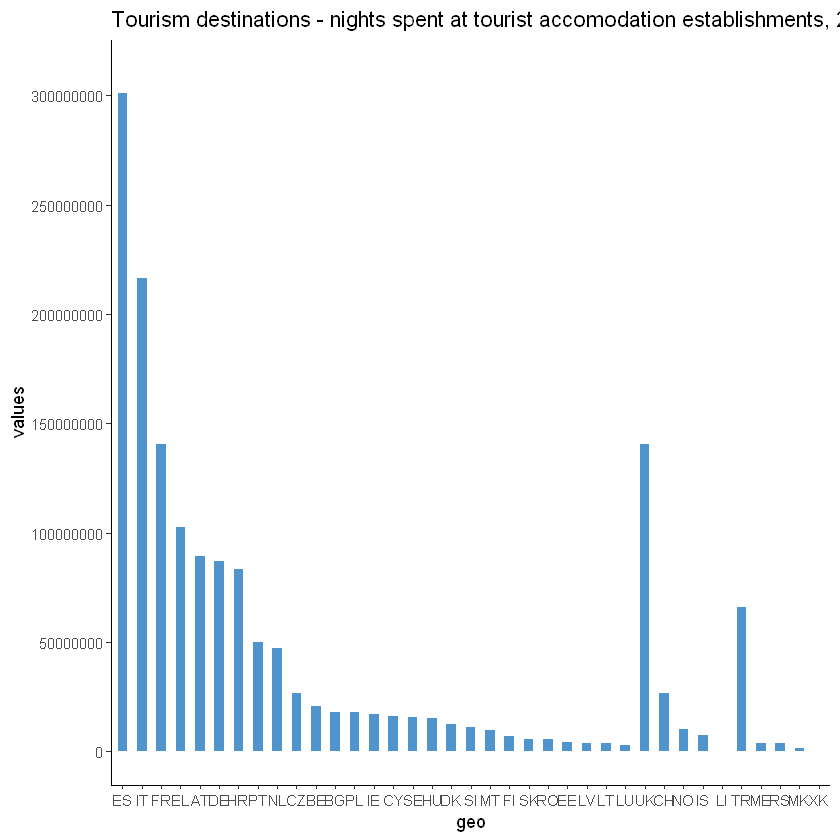

In [449]:
options(scipen=999)
ggplot(data_mod4, aes(x=geo,y=values)) +
            geom_bar(stat = "identity", position="dodge", width=0.5, fill="steelblue3") +
            theme_classic() +
            scale_y_continuous(limits = c(0, 310000000), breaks = seq(0, 300000000, by = 50000000)) +
            ggtitle("Tourism destinations - nights spent at tourist accomodation establishments, 2018")

create table 1

In [ ]:
## tourist accomodation establishments, 2018

# we need 3 datasets for each column
countr_0 <- c("BE","BG","CZ","DK","DE","EE","IE","EL","ES","FR","HR","IT","CY","LV","LT","LU","HU","MT","NL",
              "AT","PL","PT","RO","SI","SK","FI","SE","UK","IS","LI","NO","CH","ME","MK","RS","TR","XK")

In [ ]:
# column 1: number of establishments (units)
data_1 <- get_eurostat(id="tour_cap_nat")

data_1$year <- as.integer(substr(data_1$time,1,4))

levels(data_1$geo)
levels(data_1$nace_r2)
levels(data_1$unit)
levels(data_1$accommod)

# exclude the countries, which need data from 2016 and 2017
countr_1 <- c("BE","BG","CZ","DK","DE","EE","EL","ES","FR","HR","IT","CY","LV","LT","HU","MT","NL",
                         "AT","PL","PT","RO","SK","FI","SE","IS","LI","NO","CH","ME","MK","RS")
data_tab1 <- subset(data_1, 
                    data_1$geo %in% countr_1 & 
                    data_1$year==2018 &
                    data_1$nace_r2=="I551-I553"&
                    data_1$unit=="NR"&
                    data_1$accommod=="ESTBL")
data_tab1 <- data_tab1[,c(4,6)]

# for Ireland and United Kingdom we need data from 2016
countr_1_1 <- c("IE","UK")
data_tab1_1 <- subset(data_1, 
                      data_1$geo %in% countr_1_1 & 
                      data_1$year==2016 &
                      data_1$nace_r2=="I551-I553"&
                      data_1$unit=="NR"&
                      data_1$accommod=="ESTBL")
data_tab1_1 <- data_tab1_1[,c(4,6)]

# for Luxembourg, Slovenia and Kosovo we need data from 2017
countr_1_2 <- c("LU","SI","XK")
data_tab1_2 <- subset(data_1, 
                      data_1$geo %in% countr_1_2 & 
                      data_1$year==2017 &
                      data_1$nace_r2=="I551-I553"&
                      data_1$unit=="NR"&
                      data_1$accommod=="ESTBL")
data_tab1_2 <- data_tab1_2[,c(4,6)]

# for Turkey we have NA
data_tab1_3 <- data.frame( geo = "TR", values=  NA)

#matching
data_tab_col1 <- rbind(data_tab1,data_tab1_1,data_tab1_2,data_tab1_3)

# bring the country names in the order the grpahik shows
data_tab_col1 <- data_tab_col1[order(factor(data_tab_col1$geo, levels= countr_0)),]
data_tab_col1

In [ ]:
# column 2: number of bed places (thousands)

# exclude the countries, which need data from 2016 and 2017
countr_2 <- c("BE","BG","CZ","DK","DE","EE","EL","ES","FR","HR","IT","CY","LV","LT","HU","MT","NL",
                         "AT","PL","PT","RO","SK","FI","SE","IS","LI","NO","CH","ME","MK","RS","TR")
data_tab2 <- subset(data_1, 
                    data_1$geo %in% countr_2 & 
                    data_1$year==2018 &
                    data_1$nace_r2=="I551-I553"&
                    data_1$unit=="NR"&
                    data_1$accommod=="BEDPL")
data_tab2 <- data_tab2[,c(4,6)]

# for Ireland and United Kingdom we need data from 2016
countr_2_1 <- c("IE","UK")
data_tab2_1 <- subset(data_1, 
                      data_1$geo %in% countr_2_1 & 
                      data_1$year==2016 &
                      data_1$nace_r2=="I551-I553"&
                      data_1$unit=="NR"&
                      data_1$accommod=="BEDPL")
data_tab2_1 <- data_tab2_1[,c(4,6)]

# for Luxembourg, Slovenia and Kosovo we need data from 2017
countr_2_2 <- c("LU","SI","XK")
data_tab2_2 <- subset(data_1, 
                      data_1$geo %in% countr_1_2 & 
                      data_1$year==2017 &
                      data_1$nace_r2=="I551-I553"&
                      data_1$unit=="NR"&
                      data_1$accommod=="BEDPL")
data_tab2_2 <- data_tab2_2[,c(4,6)]

# for Turkey we have NA
data_tab2_3 <- data.frame( geo = "TR", values=  NA)

#matching
data_tab_col2 <- rbind(data_tab2,data_tab2_1,data_tab2_2,data_tab2_3)

# bring the country names in the order the grpahik shows
data_tab_col2 <- data_tab_col2[order(factor(data_tab_col2$geo, levels= countr_0)),]
data_tab_col2

In [ ]:
# column 3: nights spent by residents and non-residents (millions)

# we already load the data for the graph before
# exclude the countries, which need data from 2016 and monthly from 2018
countr_3 <- c("BE","BG","CZ","DK","DE","EE","EL","ES","FR","HR","IT","CY","LV","LT","LU","HU","MT","NL",
                         "AT","PL","PT","RO","SK","FI","SE","LI","MK")
data_tab3 <- subset(data, 
                    data$geo %in% countr_3 & 
                    data$year==2018 &
                    data$c_resid=="TOTAL" &
                    data$nace_r2=="I551-I553"&
                    data$unit=="NR")

data_tab3 <- data_tab3[,c(4,6)]

# for Ireland, Slovenia, United Kingdom, Switzerland, Norway, Iceland, Montenegro, Serbia and Kosovo we need 2018 monthly data
# we already load the data for the graph before
countr_3_1 <- c("IE","SI","UK","CH","NO","IS","ME","RS","XK")

data_tab3_1 <- subset(data_month, 
                    data_month$geo %in% countr_3_1 & 
                    data_month$year==2018 &
                    data_month$c_resid=="TOTAL" &
                    data_month$nace_r2=="I551-I553"&
                    data_month$unit=="NR")

data_tab3_1 <- aggregate(data_tab3_1$values, by = list(geo = data_tab3_1$geo), FUN = sum)
names(data_tab3_1)[2] <- "values"

# for Turkey we need data from 2016
countr_3_2 <- c("TR")

data_tab3_2 <- subset(data, 
                      data$geo %in% countr_3_2 & 
                      data$year==2016 &
                      data$c_resid=="TOTAL" &
                      data$nace_r2=="I551-I553"&
                      data$unit=="NR")
data_tab3_2 <- data_tab3_2[,c(4,6)]
 

#matching
data_tab_col3 <- rbind(data_tab3,data_tab3_1,data_tab3_2)

# bring the country names in the order the grpahik shows
data_tab_col3 <- data_tab_col3[order(factor(data_tab_col3$geo, levels= countr_0)),]
data_tab_col3

In [ ]:
# create column with the names of the countries
countr_names <- c("Belgium","Bulgaria","Czechia","Denmark","Germany","Estonia", "Ireland", "Greece", "Spain", "France", 
                  "Croatia", "Italy", "Cyprus", "Latvia", "Lithuania", "Luxembourg", "Hungary", "Malta", "Netherlands", 
                  "Austria", "Poland", "Portugal", "Romania", "Slovenia", "Slovakia", "Finland", "Sweden",
                 "United Kingdom", "Iceland", "Liechtenstein", "Norway", "Switzerland", "Montenegro", "North Macedonia", 
                  "Serbia", "Turkey", "Kosovo")

nrow(data_tab_col1)
nrow(data_tab_col2)
nrow(data_tab_col3)

# matching all columns together
table <- cbind(countr_names, data_tab_col1[,2], data_tab_col2[,2], data_tab_col3[,2])
table

In [450]:
# calculate the EU-27 value by summing up
EU_27 <- c("AT","BE", "BG","HR","CY", "CZ","DK", "DE", "EE","FI","FR","EL","HU","IE",
           "IT","LV","LT","LU","MT","NL","PL","PT","RO","SK","SI","ES","SE")
# we need the table from above with shortcuts instead of full names to exclude the not-EU countries 
# by using the EU_27 vector
tab_prep <- cbind(countr_0,data_tab_col1[,2], data_tab_col2[,2], data_tab_col3[,2])

EU_27_prep <- tab_prep$countr_0 %in% EU_27

tab_EU <- c("EU-27",sapply(table[EU_27_prep,2:4],sum))                
tab_EU

# put the summarized values to the calculated table from above

table_final <- rbind(tab_EU,table)
table_final

values     values.1     values.2 
     "EU-27"     "600157"   "28293931" "2791211461"

Warning message in `[<-.factor`(`*tmp*`, ri, value = "EU-27"):
"invalid factor level, NA generated"

countr_names,values,values,values
<fct>,<chr>,<chr>,<chr>
NA,600157,28293931,2791211461
Belgium,9211,389826,41320284
Bulgaria,3458,335597,26845013
Czechia,9426,741235,55513922
Denmark,1167,426075,33280395
Germany,50020,3473630,419556284
Estonia,1535,61193,6630315
Ireland,3145,199756,33382184
Greece,38180,1340451,123087178


create figure 2

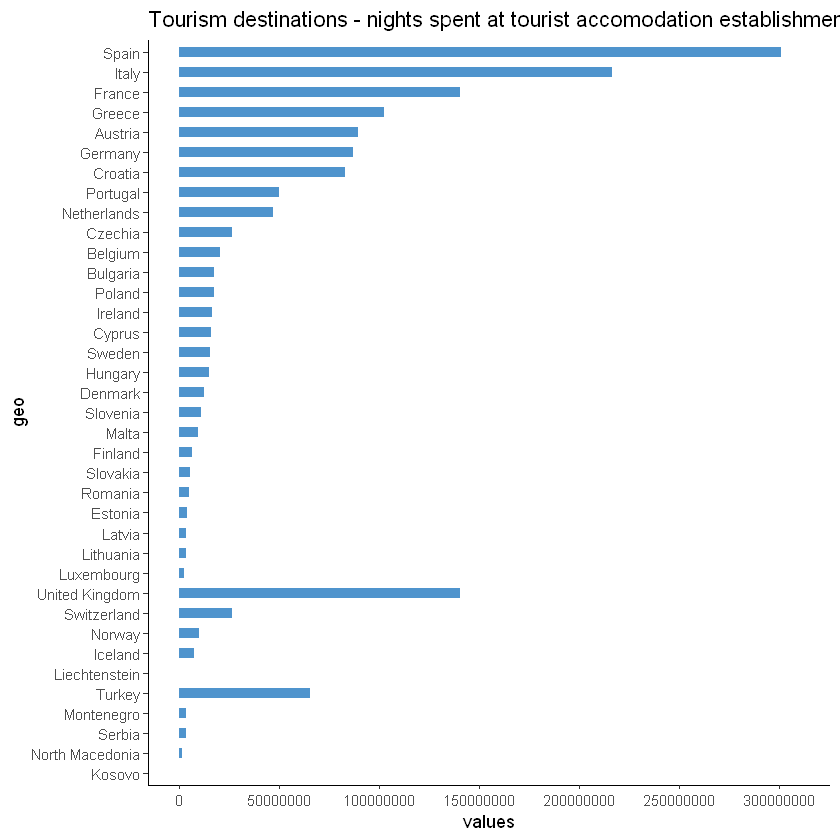

In [451]:
ggplot(data_mod4, aes(x=geo,y=values)) +
            geom_bar(stat = "identity", position="dodge", width=0.5, fill="steelblue3") +
            theme_classic() +
            scale_y_continuous(limits = c(0, 310000000), breaks = seq(0, 300000000, by = 50000000)) +
            ggtitle("Tourism destinations - nights spent at tourist accomodation establishments, 2018") +
            coord_flip() +
            scale_x_discrete(limits = rev(levels(data_mod4$geo)),
                             labels = c("Kosovo", "North Macedonia", "Serbia", "Montenegro", "Turkey", "Liechtenstein", 
                                        "Iceland", "Norway", "Switzerland", "United Kingdom", "Luxembourg", "Lithuania", 
                                        "Latvia", "Estonia", "Romania", "Slovakia", "Finland", "Malta", "Slovenia", 
                                        "Denmark", "Hungary", "Sweden", "Cyprus", "Ireland", "Poland", "Bulgaria", 
                                        "Belgium", "Czechia", "Netherlands", "Portugal", "Croatia", "Germany", "Austria", 
                                        "Greece", "France", "Italy", "Spain"))

create figure 4

In [ ]:
### we already load the dataset and can use the values from the third colomn from table 1
bev <- get_eurostat(id="demo_gind")

bev_subs <- subset(bev, 
                   bev$geo %in% countr & 
                   bev$indic_de=="JAN" &
                   bev$time=="2018-01-01")
bev_subs2 <- bev_subs[,c(2,4)]

# bring the country names in the same order like the table above to add the columns with the tourist accomodation
bev_subs2 <- bev_subs2[order(factor(bev_subs2$geo, levels= countr_0)),]
bev_subs2 <- cbind(bev_subs2,data_tab_col3)
# add the ratio-column
bev_subs2 <- cbind(bev_subs2,bev_subs2[,4]/bev_subs2[,2])
names(bev_subs2)[5] <- "values"

# create new country vector to bring the countries in the right order
countr_fig4 <- c("HR", "MT","CY","AT","EL","ES","SI","PT","IT","IE","NL","FR","SE","DK","CZ","DE","EE","LU","FI","BG",
                 "BE","HU","LT","SK","LV","PL","RO", "UK", "IS","CH","NO","LI","ME","TR","RS","MK","XK")
bev_subs3 <- bev_subs2[,c(1,5)]
bev_subs3 <- bev_subs3[order(factor(bev_subs3$geo, levels= countr_fig4)),]
bev_subs3$geo <- factor(bev_subs3$geo,
                        levels = c("HR", "MT","CY","AT","EL","ES","SI","PT","IT","IE","NL","FR","SE","DK","CZ","DE",
                                   "EE","LU","FI","BG","BE","HU","LT","SK","LV","PL","RO", "UK", "IS","CH","NO","LI",
                                   "ME","TR","RS","MK","XK"))
bev_subs3

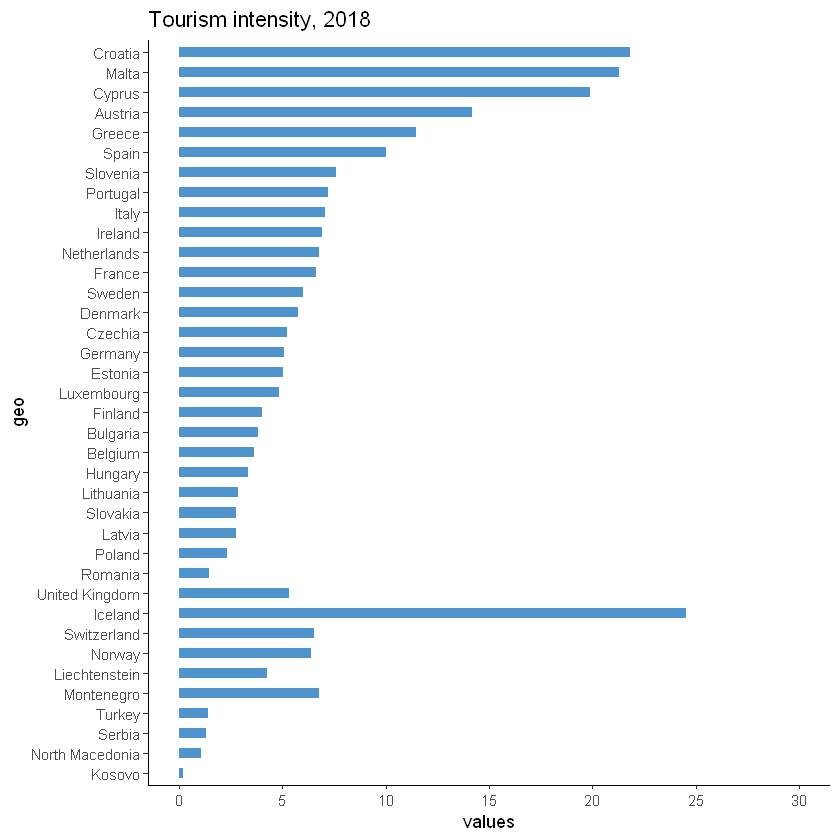

In [452]:
ggplot(bev_subs3, aes(x=geo,y=values)) +
            geom_bar(stat = "identity", position="dodge", width=0.5, fill="steelblue3") +
            theme_classic() +
            scale_y_continuous(limits = c(0, 30), breaks = seq(0, 30, by = 5)) +
            ggtitle("Tourism intensity, 2018") +
            coord_flip() +
            scale_x_discrete(limits = rev(levels(bev_subs3$geo)),
                             labels = c("Kosovo", "North Macedonia", "Serbia", "Turkey", "Montenegro", "Liechtenstein", 
                                        "Norway", "Switzerland", "Iceland", "United Kingdom", "Romania", "Poland", 
                                        "Latvia", "Slovakia", "Lithuania", "Hungary", "Belgium", "Bulgaria", "Finland", 
                                        "Luxembourg", "Estonia", "Germany", "Czechia", "Denmark", "Sweden", "France", 
                                        "Netherlands", "Ireland", "Italy", "Portugal", "Slovenia", "Spain", "Greece", 
                                        "Austria", "Cyprus", "Malta", "Croatia"))

create figure 3

In [ ]:
# calculate the EU-27 value by summing up
EU_27_prep2 <- data_mod4$geo %in% EU_27
tab_EU2 <- sapply(as.data.frame(data_mod4[EU_27_prep2,2]),sum)

# add a column with the ratio we need for the pie chart
tab_ratio <- cbind(data_mod4,data_mod4[2]/tab_EU2*100)
tab_ratio <- tab_ratio[EU_27_prep2,]
tab_ratio <- tab_ratio[order(tab_ratio[,3], decreasing=T),]

# keep the top 9 countries and summing up the others to "Rest of EU-27"
tab_ratio_top9 <- tab_ratio[1:9,]
tab_ratio_other <- tab_ratio[10:27,]
tab_ratio_other_sum <- sapply(as.data.frame(tab_ratio_other[,3]),sum)
tab_ratio_new <- rbind(tab_ratio_top9[,c(1,3)], tab_ratio_other_sum)
tab_ratio_new

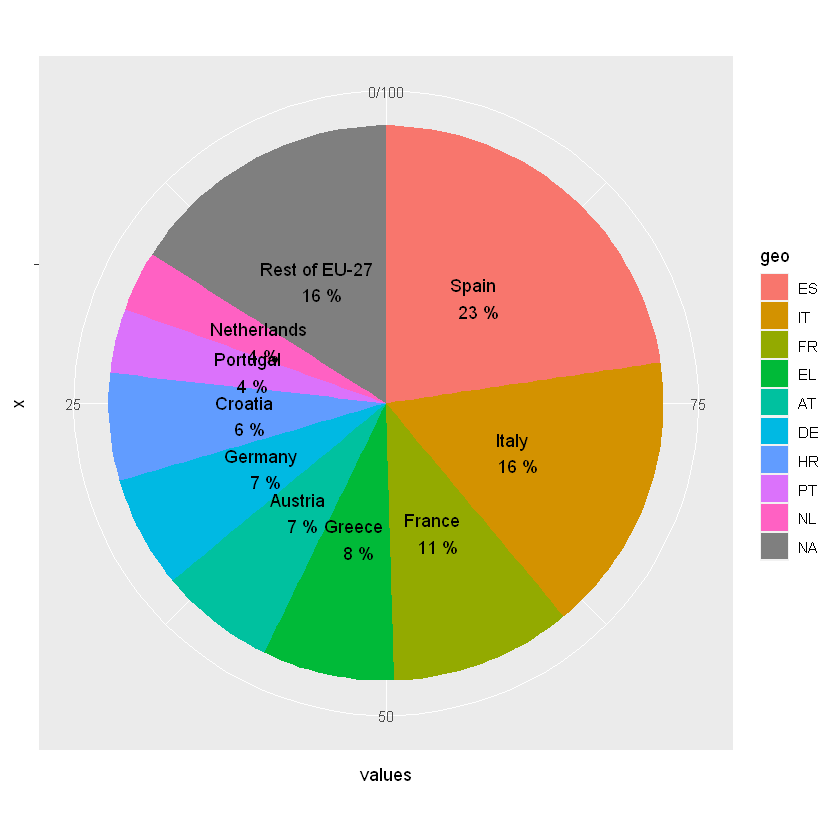

In [453]:
# plot the pie chart 
label_pie1 <- paste(round(tab_ratio_new$values,0), "%")
label_pie2 <- c("Spain","Italy","France","Greece","Austria","Germany","Croatia","Portugal","Netherlands","Rest of EU-27")
label_pie3 <- paste(label_pie2,"\n",label_pie1)


ggplot(tab_ratio_new, aes(x="", y=values, fill=geo)) +
       geom_bar(stat = "identity", width=1) +
       coord_polar("y", direction = -1, start=0) +
       geom_text(label = label_pie3, position = position_stack(vjust = 0.5)) 
      

create table 2

In [ ]:
# column 1,2,3
data_2 <- get_eurostat(id="tour_dem_tttot")

data_2$year <- as.integer(substr(data_2$time,1,4))

duration_vec <-  c("N_GE1","N1-3","N_GE4")

data_tab2_part1 <- as.data.frame(matrix(ncol = 3, nrow = 30))


for (i in 1:3) {

# exclude the countries, which need data from 2017
countr_tab2_1_1 <- c("BE","BG","CZ","DK","DE","EE","IE","EL","ES","FR","HR","IT","CY","LV","LT","LU","HU","MT","NL",
                 "AT","PT","SI","SK","FI","SE","UK","IS","LI","NO","CH","ME","MK","RS","TR","XK")
data_2_col1_1 <- subset(data_2, 
                    data_2$geo %in% countr_tab2_1_1 & 
                    data_2$year==2018 &
                    data_2$purpose=="TOTAL"&
                    data_2$duration==duration_vec[i]&
                    data_2$unit=="THS" &
                    data_2$partner=="WORLD")
data_2_col1_1 <- data_2_col1_1[,c(5,7)]

# for Poland and Romania we need data from 2017
countr_tab2_1_2 <- c("PL","RO")
data_2_col1_2 <- subset(data_2, 
                    data_2$geo %in% countr_tab2_1_2 & 
                    data_2$year==2017 &
                    data_2$purpose=="TOTAL"&
                    data_2$duration==duration_vec[i]&
                    data_2$unit=="THS" &
                    data_2$partner=="WORLD")
data_2_col1_2  <- data_2_col1_2[,c(5,7)]

# for United Kingdom we have NA
data_2_col1_3 <- data.frame( geo = "UK", values=  NA)
    
#matching
data_tab2_col1 <- rbind(data_2_col1_1,data_2_col1_2,data_2_col1_3)

# bring the country names in the order the grpahik shows
data_tab2_col1 <- data_tab2_col1[order(factor(data_tab2_col1$geo, levels= countr_0)),]
data_tab2_col1$values <- round(data_tab2_col1$values,0)
data_tab2_col1
  
# print(data_tab2_col1)
    
data_tab2_part1[,i] <- data_tab2_col1[,2]
    
 }

In [ ]:
# create column with the names of the countries
countr_names2 <- c("Belgium","Bulgaria","Czechia","Denmark","Germany","Estonia", "Ireland", "Greece", "Spain", "France", 
                  "Croatia", "Italy", "Cyprus", "Latvia", "Lithuania", "Luxembourg", "Hungary", "Malta", "Netherlands", 
                  "Austria", "Poland", "Portugal", "Romania", "Slovenia", "Slovakia", "Finland", "Sweden",
                 "United Kingdom", "Norway", "Switzerland")

# column 1,2,3
table2_vers1 <- cbind(countr_names2, data_tab2_part1)

In [ ]:
# column 4,5
duration_vec2 <-  c("N1-3","N_GE4")

data_tab2_part2 <- as.data.frame(matrix(ncol = 2, nrow = 30))


for (i in 1:2) {

# exclude the countries, which need data from 2017
countr_tab2_1_1 <- c("BE","BG","CZ","DK","DE","EE","IE","EL","ES","FR","HR","IT","CY","LV","LT","LU","HU","MT","NL",
                 "AT","PT","SI","SK","FI","SE","UK","IS","LI","NO","CH","ME","MK","RS","TR","XK")
data_2_col2_1 <- subset(data_2, 
                    data_2$geo %in% countr_tab2_1_1 & 
                    data_2$year==2018 &
                    data_2$purpose=="TOTAL"&
                    data_2$duration==duration_vec2[i]&
                    data_2$unit=="THS" &
                    data_2$partner=="DOM")
data_2_col2_1 <- data_2_col2_1[,c(5,7)]

# for Poland and Romania we need data from 2017
countr_tab2_1_2 <- c("PL","RO")
data_2_col2_2 <- subset(data_2, 
                    data_2$geo %in% countr_tab2_1_2 & 
                    data_2$year==2017 &
                    data_2$purpose=="TOTAL"&
                    data_2$duration==duration_vec2[i]&
                    data_2$unit=="THS" &
                    data_2$partner=="DOM")
data_2_col2_2  <- data_2_col2_2[,c(5,7)]

# for United Kingdom we have NA
data_2_col2_3 <- data.frame( geo = "UK", values=  NA)
    
#matching
data_tab2_col2 <- rbind(data_2_col2_1,data_2_col2_2,data_2_col2_3)

# bring the country names in the order the grpahik shows
data_tab2_col2 <- data_tab2_col2[order(factor(data_tab2_col2$geo, levels= countr_0)),]
data_tab2_col2$values <- round(data_tab2_col2$values,0)
data_tab2_col2
  
#print(data_tab2_col2)
    
data_tab2_part2[,i] <- round(data_tab2_col2[,2]/table2[,2]*100,1)
    
 }

In [ ]:
# column 6,7
duration_vec2 <-  c("N1-3","N_GE4")

data_tab2_part3 <- as.data.frame(matrix(ncol = 2, nrow = 30))


for (i in 1:2) {

# exclude the countries, which need data from 2017
countr_tab2_1_1 <- c("BE","BG","CZ","DK","DE","EE","IE","EL","ES","FR","HR","IT","CY","LV","LT","LU","HU","MT","NL",
                 "AT","PT","SI","SK","FI","SE","UK","IS","LI","NO","CH","ME","MK","RS","TR","XK")
data_2_col3_1 <- subset(data_2, 
                    data_2$geo %in% countr_tab2_1_1 & 
                    data_2$year==2018 &
                    data_2$purpose=="TOTAL"&
                    data_2$duration==duration_vec2[i]&
                    data_2$unit=="THS" &
                    data_2$partner=="OUT")
data_2_col3_1 <- data_2_col3_1[,c(5,7)]

# for Poland and Romania we need data from 2017
countr_tab2_1_2 <- c("PL","RO")
data_2_col3_2 <- subset(data_2, 
                    data_2$geo %in% countr_tab2_1_2 & 
                    data_2$year==2017 &
                    data_2$purpose=="TOTAL"&
                    data_2$duration==duration_vec2[i]&
                    data_2$unit=="THS" &
                    data_2$partner=="OUT")
data_2_col3_2  <- data_2_col3_2[,c(5,7)]

# for United Kingdom we have NA
data_2_col3_3 <- data.frame( geo = "UK", values=  NA)
    
#matching
data_tab2_col3 <- rbind(data_2_col3_1,data_2_col3_2,data_2_col3_3)

# bring the country names in the order the grpahik shows
data_tab2_col3 <- data_tab2_col3[order(factor(data_tab2_col3$geo, levels= countr_0)),]
data_tab2_col3$values <- round(data_tab2_col3$values,0)
data_tab2_col3
  
#print(data_tab2_col2)
    
data_tab2_part3[,i] <- round(data_tab2_col3[,2]/table2[,2]*100,1)
    
 }

In [ ]:
# matching table2 with the remaining columns (i.e. column 4-7)
table2_vers2 <- cbind(table2_vers1, data_tab2_part2, data_tab2_part3)
table2_vers2

In [ ]:
# add the last column
data_3 <- get_eurostat(id="tour_dem_totot")

data_3$year <- as.integer(substr(data_3$time,1,4))

# exclude the countries, which need data from 2016 and 2017
countr_tab2_2_1 <- c("BE","BG","CZ","DK","DE","EE","IE","EL","ES","FR","HR","IT","CY","LT","LU","HU","MT","NL",
                     "PL","PT","RO","SI","SK","FI","SE","IS","LI","NO","CH","ME","RS","TR")
data_2_col4_1 <- subset(data_3, 
                    data_3$geo %in% countr_tab2_2_1 & 
                    data_3$year==2018 &
                    data_3$duration=="N_GE1"&
                    data_3$unit=="PC_POP"&
                    data_3$partner=="WORLD")
data_2_col4_1 <- data_2_col4_1[,c(4,6)]

# for Ireland and United Kingdom we need data from 2016
countr_tab2_2_2 <- c("UK")
data_2_col4_2 <- subset(data_3, 
                    data_3$geo %in% countr_tab2_2_2 & 
                    data_3$year==2016 &
                    data_3$duration=="N_GE1"&
                    data_3$unit=="PC_POP"&
                    data_3$partner=="WORLD")
data_2_col4_2 <- data_2_col4_2[,c(4,6)]

# for Luxembourg, Slovenia and Kosovo we need data from 2017
countr_tab2_2_3 <- c("LV","AT")
data_2_col4_3 <- subset(data_3, 
                    data_3$geo %in% countr_tab2_2_3 & 
                    data_3$year==2017 &
                    data_3$duration=="N_GE1"&
                    data_3$unit=="PC_POP"&
                    data_3$partner=="WORLD")
data_2_col4_3 <- data_2_col4_3[,c(4,6)]

#matching
data_tab2_part4 <- rbind(data_2_col4_1, data_2_col4_2, data_2_col4_3)

# bring the country names in the order the grpahik shows
data_tab2_part4 <- data_tab2_part4[order(factor(data_tab2_part4$geo, levels= countr_0)),]
data_tab2_part4$values <- round(data_tab2_part4$values, 1)
data_tab2_part4 
# here we can keep the country shortcuts, because we need them to calculate the EU-value later 
# by matching the last column to table2, we can delete the shortcut column, because here we need the full names

In [ ]:
# matching table2 with the last column
table2_vers3 <- cbind(table2_vers2, data_tab2_part4[,2])
table2_vers3

In [454]:
# calculate the EU-27 value by summing up (for column 1-3) and by building the average (for column 4-7)
EU_27_prep3 <- table2$geo %in% EU_27

# we need the table from above with shortcuts instead of full names to exclude the not-EU countries 
# by using the EU_27 vector
# remember that by calculating the last column as a intermediate step for table2 we keeped the shortcuts for the countries
# data_tab2_part4[,1] --> this are the shortcuts
# add this to our table2

tab_prep3 <- cbind(data_tab2_part4[,1], table2_vers3[,2:9])

EU_27_prep3 <- tab_prep3$geo %in% EU_27

tab_EU3_1 <- c("EU-27",sapply(table2_vers3[EU_27_prep3,2:4],sum))  
tab_EU3_2 <- c(sapply(table2_vers3[EU_27_prep3,5:9],mean, na.rm=T))
tab_EU3 <- round(as.numeric(c(tab_EU3_1,tab_EU3_2)),1)
tab_EU3

# put the summarized values to the calculated table from above
table2_final <- rbind(tab_EU3,table2_vers3)
table2_final

Warning message in eval(expr, envir, enclos):
"NAs durch Umwandlung erzeugt"

[1]        NA 1130622.0  619562.0  511063.0      43.5      19.1      13.6
[8]      23.8      65.1

countr_names2,V1,V2,V3,V1,V2,V1,V2,values
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,1130622,619562,511063,43.5,19.1,13.6,23.8,65.1
Belgium,16893,7058,9835,15.7,6.8,26.1,51.4,67.7
Bulgaria,5090,2748,2343,48.0,33.5,6.0,12.5,33.8
Czechia,34569,21380,13189,55.7,23.0,6.2,15.2,78.1
Denmark,18875,10380,8495,44.0,19.2,11.0,25.8,69.9
Germany,267879,132289,135591,40.0,19.5,9.4,31.1,75.3
Estonia,6468,5109,1358,63.5,4.5,15.5,16.5,79.5
Ireland,15941,10110,5831,45.9,8.0,17.5,28.6,74.7
Greece,6565,1834,4731,25.0,61.7,2.9,10.4,42.8


create figure 5

In [ ]:
# we calculated the needed data already for table2 (last column)
# but Albania and North Mazedonia are missing
# for Ireland and United Kingdom we need data from 2016
countr_tab2_2_3 <- c("MK","AL")
data_2_col4_4 <- subset(data_3, 
                    data_3$geo %in% countr_tab2_2_3 & 
                    data_3$year==2018 &
                    data_3$duration=="N_GE1"&
                    data_3$unit=="PC_POP"&
                    data_3$partner=="WORLD")
data_2_col4_4 <- data_2_col4_4[,c(4,6)]

#matching
data_tab2_part5 <- rbind(tab_EU3[9],data_tab2_part4, data_2_col4_4)

# create new country vector to bring the countries in the right order
countr_fig5 <- c("EU-27","FI", "NL","SE","LU","EE","CZ","AT","DE","IE","FR","SK","DK","CY","SI","BE","ES","MT","PL","LV","HU",
                 "LT","HR","IT","PT","EL","BG","RO", "UK", "NO","CH","AL","MK")
data_tab2_part5 <- data_tab2_part5[order(factor(data_tab2_part5$geo, levels= countr_fig5)),]
data_tab2_part5$geo <- factor(data_tab2_part5$geo,
                        levels = c("EU-27","FI", "NL","SE","LU","EE","CZ","AT","DE","IE","FR","SK","DK","CY","SI","BE","ES","MT",
                                   "PL","LV","HU","LT","HR","IT","PT","EL","BG","RO", "UK", "NO","CH","AL","MK"))
data_tab2_part5

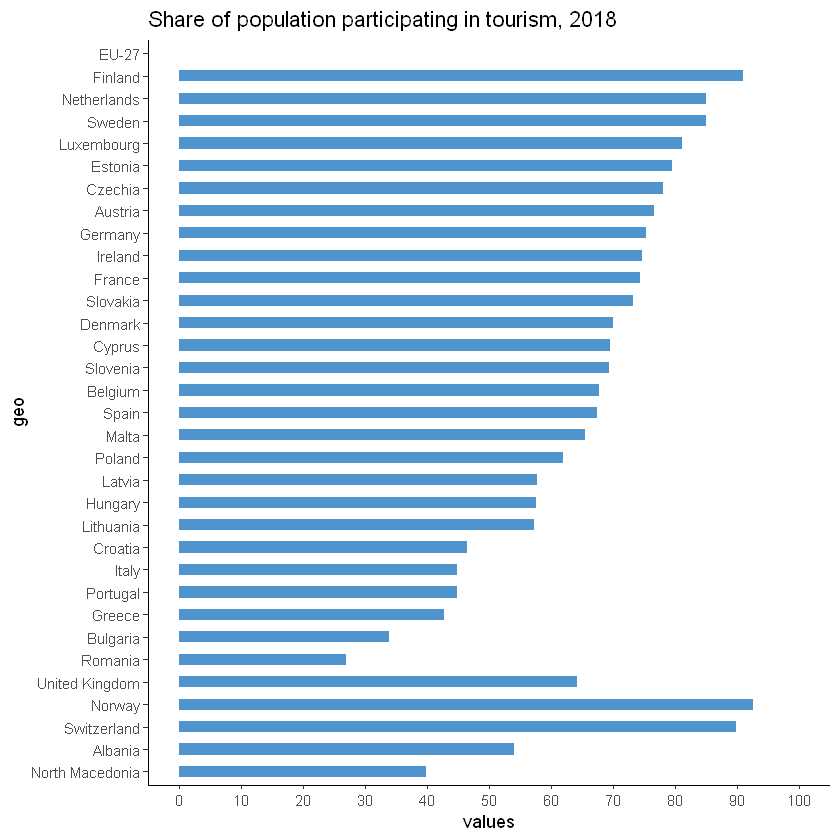

In [455]:
ggplot(data_tab2_part5, aes(x=geo,y=values)) +
            geom_bar(stat = "identity", position="dodge", width=0.5, fill="steelblue3", na.rm=T) +
            theme_classic() +
            scale_y_continuous(limits = c(0, 100), breaks = seq(0, 100, by = 10)) +
            ggtitle("Share of population participating in tourism, 2018") +
            coord_flip()+
            scale_x_discrete(limits = rev(levels(data_tab2_part5$geo)),
                             labels = c("North Macedonia", "Albania", "Switzerland", "Norway", "United Kingdom", 
                                        "Romania", "Bulgaria", "Greece", "Portugal", "Italy", "Croatia", "Lithuania", 
                                        "Hungary", "Latvia", "Poland", "Malta", "Spain", "Belgium", "Slovenia", "Cyprus", 
                                        "Denmark", "Slovakia", "France", "Ireland", "Germany", "Austria", "Czechia", 
                                        "Estonia", "Luxembourg", "Sweden", "Netherlands", "Finland", "EU-27"))

create figure 6

In [ ]:
data_fig6 <- get_eurostat(id="tour_dem_tntot")

data_fig6$year <- as.integer(substr(data_fig6$time,1,4))

countr_fig6 <- countr <- c("ES","IT","FR","EL","AT","DE","HR","PT","NL","CZ","BE","BG","IE","CY","SE","HU","DK","SI",
                         "MT","FI","SK","EE","LV","LT","LU","UK","CH","NO","IS","LI","TR","ME","RS","MK","XK")

data_fig6_subs <- subset(data_fig6, 
                    data_fig6$geo %in% countr_fig6 & 
                    data_fig6$year==2018 &
                    data_fig6$purpose=="TOTAL" &
                    data_fig6$duration=="N_GE1"&
                    data_fig6$unit=="NR"&
                    data_fig6$partner=="OUT")
data_fig6_subs <- data_fig6_subs[,c(5,7)]

# for Poland we need data from 2017
countr_fig6_2 <- c("PL","RO")
data_fig6_subs2 <- subset(data_fig6, 
                    data_fig6$geo %in% countr_fig6_2 & 
                    data_fig6$year==2017 &
                    data_fig6$purpose=="TOTAL" &
                    data_fig6$duration=="N_GE1"&
                    data_fig6$unit=="NR"&
                    data_fig6$partner=="OUT")
data_fig6_subs2 <- data_fig6_subs2[,c(5,7)]

data_fig6_subs <- rbind(data_fig6_subs,data_fig6_subs2)
data_fig6_subs


In [ ]:
# calculate the EU-27 value by summing up
EU_27_prep4 <- data_fig6_subs$geo %in% EU_27
tab_EU4 <- sapply(as.data.frame(data_fig6_subs[EU_27_prep4,2]),sum)
tab_EU4

# add a column with the ratio we need for the pie chart
tab_ratio2 <- cbind(data_fig6_subs,data_fig6_subs[2]/tab_EU4*100)
tab_ratio2 <- tab_ratio2[EU_27_prep4,]
tab_ratio2 <- tab_ratio2[order(tab_ratio2[,3], decreasing=T),]

# keep the top 9 countries and summing up the others to "Rest of EU-27"
tab_ratio_top9_2 <- tab_ratio2[1:9,]
tab_ratio_other_2 <- tab_ratio2[10:27,]
tab_ratio_other_2_sum <- sapply(as.data.frame(tab_ratio_other_2[,3]),sum)
tab_ratio_new_2 <- rbind(tab_ratio_top9_2[,c(1,3)], tab_ratio_other_2_sum)
tab_ratio_new_2

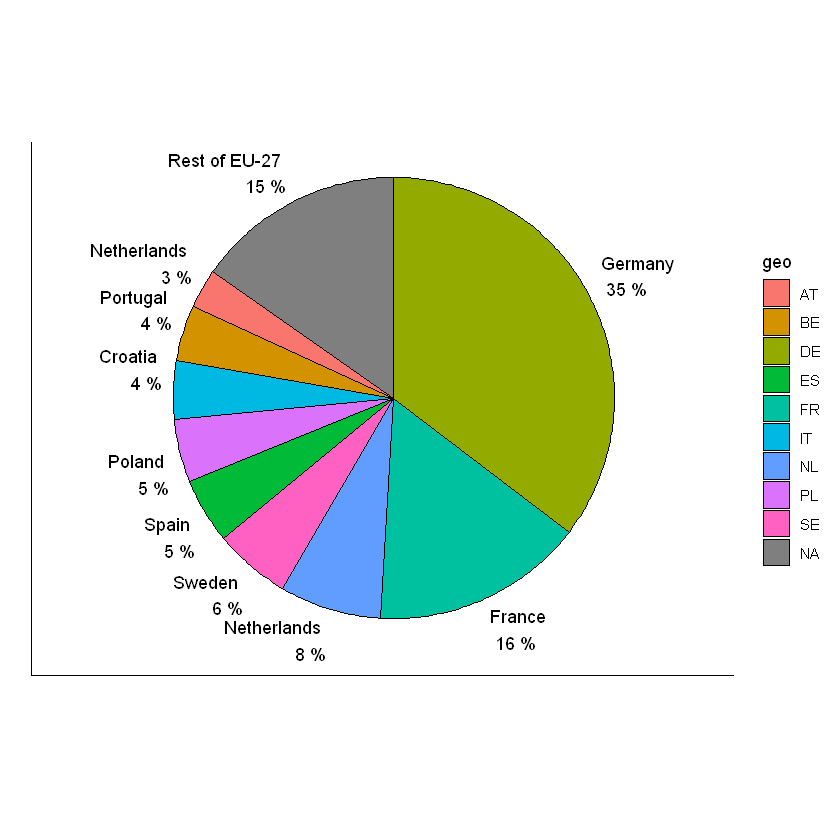

In [456]:
# plot the pie chart 
label_pie2_1 <- paste(round(tab_ratio_new_2$values,0), "%")
label_pie2_2 <- c("Germany","France","Netherlands","Sweden","Spain","Poland","Croatia","Portugal",
                  "Netherlands","Rest of EU-27")
label_pie2_3 <- paste(label_pie2_2,"\n",label_pie2_1)

tab_ratio_new_2 <- tab_ratio_new_2 %>% 
  mutate(end = 2 * pi * cumsum(values)/sum(values),
         start = lag(end, default = 0),
         middle = 0.5 * (start + end),
         hjust = ifelse(middle > pi, 1, 0),
         vjust = ifelse(middle < pi/2 | middle > 3 * pi/2, 0, 1))

ggplot(tab_ratio_new_2) + 
  geom_arc_bar(aes(x0 = 0, y0 = 0, r0 = 0, r = 1,
                   start = start, end = end, fill = geo)) +
  geom_text(aes(x = 1.05 * sin(middle), y = 1.05 * cos(middle), label = label_pie2_3,
                hjust = hjust, vjust = vjust)) +
  coord_fixed() +
  scale_x_continuous(limits = c(-1.5, 1.4),  # Adjust so labels are not cut off
                     name = "", breaks = NULL, labels = NULL) +
  scale_y_continuous(limits = c(-1.15, 1.05),      # Adjust so labels are not cut off
                     name = "", breaks = NULL, labels = NULL) +
  theme_classic()

create figure 7

In [ ]:
# we need the number of population by people aged over 15 years
data_fig7 <- get_eurostat(id="demo_pjanbroad")

data_fig7$year <- as.integer(substr(data_fig7$time,1,4))

countr_fig7 <- c("LU","SE","CY","NL","IE","DE","FI","EE","BE","AT","DK","SI","MT","FR","LT","SK",
                 "CZ","LV","HU","PL","HR","ES","IT","PT","BG","EL","RO","NO","CH")

In [ ]:
data_fig7_subs <- subset(data_fig7, 
                    data_fig7$geo %in% countr_fig7 & 
                    data_fig7$year==2018 &
                    data_fig7$age %in% c("Y15-64","Y_GE65") &
                    data_fig7$sex=="T")
data_fig7_subs <- data_fig7_subs[,c(4,6)]
data_fig7_subs <- aggregate(data_fig7_subs$values, by = list(geo = data_fig7_subs$geo), FUN = sum)

# bring the countries in the order the graphik shows
data_fig6_subs_fig7 <- data_fig6_subs[order(factor(data_fig6_subs$geo, levels= countr_fig7)),]
data_fig7_subs_2 <- data_fig7_subs[order(factor(data_fig7_subs$geo, levels= countr_fig7)),]
# data_fig7_subs_2$geo; data_fig6_subs_fig7$geo #compare the countries: are they in the same order? then we can match.

# matching the two data frames and calculate the ratio
data_fig7_final <- cbind(data_fig6_subs_fig7,data_fig7_subs_2[,2])
data_fig7_final$ratio <- round(data_fig7_final[,2]/data_fig7_final[,3],1)
data_fig7_final

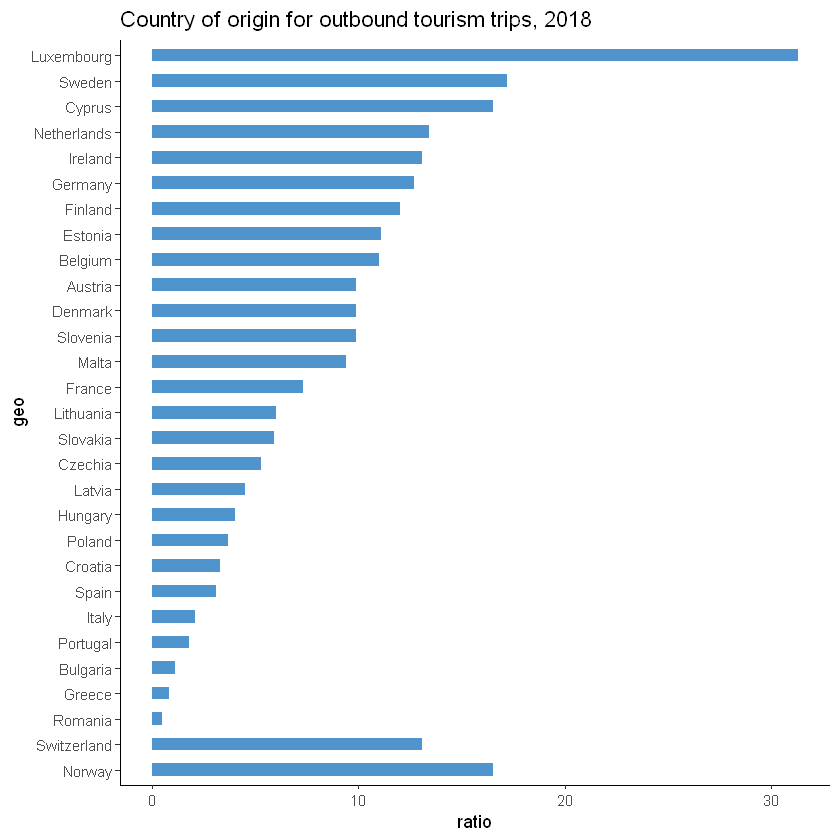

In [457]:
data_fig7_final$geo <- factor(data_fig7_final$geo,
                        levels = c("LU","SE","CY","NL","IE","DE","FI","EE","BE","AT","DK","SI","MT","FR","LT","SK",
                                   "CZ","LV","HU","PL","HR","ES","IT","PT","BG","EL","RO","NO","CH"))

ggplot(data_fig7_final, aes(x=geo,y=ratio)) +
            geom_bar(stat = "identity", position="dodge", width=0.5, fill="steelblue3", na.rm=T) +
            theme_classic() +
            ggtitle("Country of origin for outbound tourism trips, 2018") +
            coord_flip()+
            scale_x_discrete(limits = rev(data_fig7_final$geo),
                             labels = c("Norway", "Switzerland", "Romania", "Greece", "Bulgaria", "Portugal", "Italy", 
                                        "Spain", "Croatia", "Poland", "Hungary", "Latvia", "Czechia", "Slovakia", 
                                        "Lithuania", "France", "Malta", "Slovenia", "Denmark", "Austria",
                                        "Belgium", "Estonia", "Finland", "Germany", "Ireland", "Netherlands",
                                        "Cyprus", "Sweden", "Luxembourg"))

create table 3